<a href="https://colab.research.google.com/github/Saiganesh17/CppPatterns/blob/main/Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = !unrar x /content/drive/MyDrive/Dataset.rar

In [ ]:
data=r'/content/Dataset'

In [ ]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [ ]:
images[:20]

['/content/Dataset/large cell carcinoma/000098 (3).png',
 '/content/Dataset/large cell carcinoma/000031.png',
 '/content/Dataset/large cell carcinoma/000023 (2).png',
 '/content/Dataset/large cell carcinoma/000003 (3).png',
 '/content/Dataset/large cell carcinoma/000026 (2).png',
 '/content/Dataset/large cell carcinoma/000095 (3).png',
 '/content/Dataset/large cell carcinoma/000068 (3).png',
 '/content/Dataset/large cell carcinoma/000105 (2).png',
 '/content/Dataset/large cell carcinoma/000098 (4).png',
 '/content/Dataset/large cell carcinoma/000059 (4).png',
 '/content/Dataset/large cell carcinoma/di1.png',
 '/content/Dataset/large cell carcinoma/000017.png',
 '/content/Dataset/large cell carcinoma/000078 (3).png',
 '/content/Dataset/large cell carcinoma/000020 (3).png',
 '/content/Dataset/large cell carcinoma/000019 (4).png',
 '/content/Dataset/large cell carcinoma/000027 (2).png',
 '/content/Dataset/large cell carcinoma/000057 (4).png',
 '/content/Dataset/large cell carcinoma/l5.png

In [ ]:
len(images)

613

In [ ]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [ ]:
class_values[:10]

['large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma',
 'large cell carcinoma']

In [ ]:
len(class_values)

613

In [ ]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'class_label'])

In [ ]:
data

,image_path,class_label
0,/content/Dataset/squamous cell carcinoma/00007...,squamous cell carcinoma
1,/content/Dataset/squamous cell carcinoma/00007...,squamous cell carcinoma
2,/content/Dataset/adenocarcinoma/000102 (7).png,adenocarcinoma
3,/content/Dataset/large cell carcinoma/000104.png,large cell carcinoma
4,/content/Dataset/squamous cell carcinoma/00003...,squamous cell carcinoma
...,...,...
608,/content/Dataset/squamous cell carcinoma/00010...,squamous cell carcinoma
609,/content/Dataset/squamous cell carcinoma/00000...,squamous cell carcinoma
610,/content/Dataset/normal/13 (2) - Copy.png,normal
611,/content/Dataset/squamous cell carcinoma/00001...,squamous cell carcinoma


In [ ]:
data.class_label.value_counts()

class_label
adenocarcinoma             195
squamous cell carcinoma    155
normal                     148
large cell carcinoma       115
Name: count, dtype: int64

In [ ]:
df_c0 = data[data['class_label'] =="adenocarcinoma"]
df_c1 = data[data['class_label'] =="squamous cell carcinoma"]
df_c2 = data[data['class_label'] =="normal"]
df_c3 = data[data['class_label'] =="large cell carcinoma"]

# New Section

# New Section

In [ ]:
from sklearn.utils import resample
unsampled_df_c0 = resample(df_c0, replace=True, random_state=23, n_samples=150)
unsampled_df_c1 = resample(df_c1, replace=True, random_state=23, n_samples=150)
unsampled_df_c2 = resample(df_c2, replace=True, random_state=23, n_samples=150)
unsampled_df_c3 = resample(df_c3, replace=True, random_state=23, n_samples=150)

In [ ]:
df_unsampled = pd.concat([unsampled_df_c0, unsampled_df_c1,unsampled_df_c2, unsampled_df_c3])
df_unsampled

,image_path,class_label
257,/content/Dataset/adenocarcinoma/000023 (9).png,adenocarcinoma
108,/content/Dataset/adenocarcinoma/000092 (10).png,adenocarcinoma
561,/content/Dataset/adenocarcinoma/000013 (4).png,adenocarcinoma
83,/content/Dataset/adenocarcinoma/000009 (3).png,adenocarcinoma
277,/content/Dataset/adenocarcinoma/000093 (6).png,adenocarcinoma
...,...,...
278,/content/Dataset/large cell carcinoma/000017.png,large cell carcinoma
580,/content/Dataset/large cell carcinoma/000034 (...,large cell carcinoma
256,/content/Dataset/large cell carcinoma/000089.png,large cell carcinoma
364,/content/Dataset/large cell carcinoma/000062 (...,large cell carcinoma


In [ ]:
df_unsampled.head()

,image_path,class_label
257,/content/Dataset/adenocarcinoma/000023 (9).png,adenocarcinoma
108,/content/Dataset/adenocarcinoma/000092 (10).png,adenocarcinoma
561,/content/Dataset/adenocarcinoma/000013 (4).png,adenocarcinoma
83,/content/Dataset/adenocarcinoma/000009 (3).png,adenocarcinoma
277,/content/Dataset/adenocarcinoma/000093 (6).png,adenocarcinoma


In [ ]:
df_unsampled.tail()

,image_path,class_label
278,/content/Dataset/large cell carcinoma/000017.png,large cell carcinoma
580,/content/Dataset/large cell carcinoma/000034 (...,large cell carcinoma
256,/content/Dataset/large cell carcinoma/000089.png,large cell carcinoma
364,/content/Dataset/large cell carcinoma/000062 (...,large cell carcinoma
596,/content/Dataset/large cell carcinoma/000094 (...,large cell carcinoma


In [ ]:
df_unsampled.class_label.value_counts()

class_label
adenocarcinoma             150
squamous cell carcinoma    150
normal                     150
large cell carcinoma       150
Name: count, dtype: int64

In [ ]:
df_unsampled.shape

(600, 2)

In [ ]:
data = df_unsampled.sample(frac=1)
data.shape

(600, 2)

In [ ]:
data[:10]

,image_path,class_label
445,/content/Dataset/normal/12.png,normal
371,/content/Dataset/normal/16 - Copy (3).png,normal
179,/content/Dataset/squamous cell carcinoma/00006...,squamous cell carcinoma
16,/content/Dataset/normal/n8.jpg,normal
249,/content/Dataset/large cell carcinoma/000056 (...,large cell carcinoma
51,/content/Dataset/normal/7 (2) - Copy.png,normal
191,/content/Dataset/adenocarcinoma/000018 (5).png,adenocarcinoma
298,/content/Dataset/large cell carcinoma/000084.png,large cell carcinoma
180,/content/Dataset/adenocarcinoma/000105.png,adenocarcinoma
33,/content/Dataset/normal/17 (2) - Copy.png,normal


<ipython-input-23-2d1eefe42530>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))


Text(0.5, 0, 'Class_label')

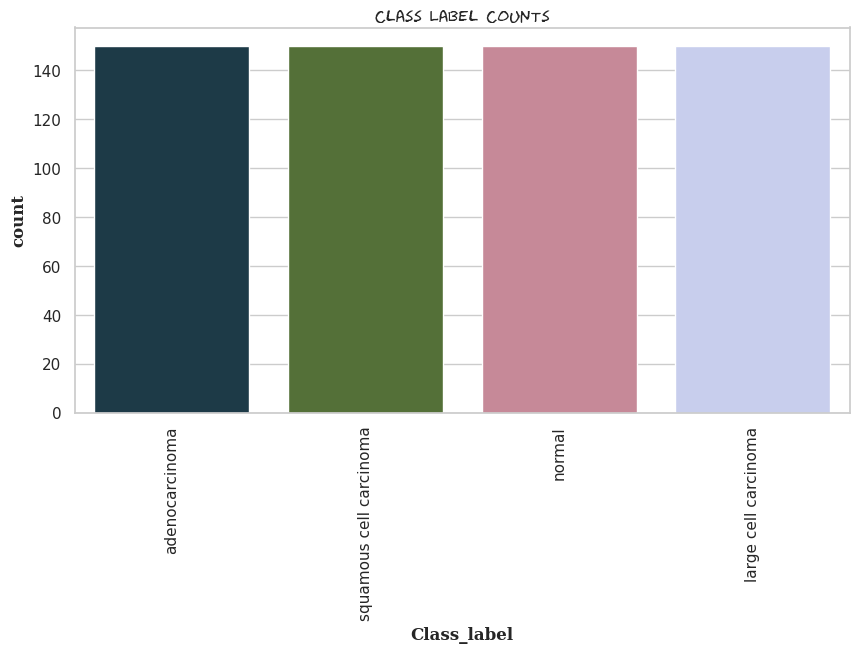

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="class_label", data=df_unsampled, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

In [ ]:
def resize_image(img):
    file = cv2.imread(img)
    print("START")
    print(file)
    print(img)
    print("END")
    resized = cv2.resize(file, (224,224), interpolation = cv2.INTER_AREA)
    resized= np.array(resized)
    image = np.reshape(resized,[1,224,224,3])
    return resized

In [ ]:
images=[resize_image(img) for img in data['image_path']]

Streaming output truncated to the last 5000 lines.
  [69 69 69]
  [55 55 55]
  ...
  [75 75 75]
  [81 81 81]
  [76 76 76]]]
/content/Dataset/normal/11 (2) - Copy.png
END
START
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
/content/Dataset/adenocarcinoma/000091 (3).png
END
START
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[151 151 151]
  [163 163 163]
  [

In [ ]:
images = []
for i in data['image_path']:
    file_name, file_extension = os.path.splitext(i)
    if file_extension == '.db':
        print(file_name)
    else:
        app = resize_image(i)
        images.append(app)

Streaming output truncated to the last 5000 lines.
  [69 69 69]
  [55 55 55]
  ...
  [75 75 75]
  [81 81 81]
  [76 76 76]]]
/content/Dataset/normal/11 (2) - Copy.png
END
START
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [1 1 1]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
/content/Dataset/adenocarcinoma/000091 (3).png
END
START
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[151 151 151]
  [163 163 163]
  [

In [ ]:
len(images)

600

In [ ]:
data['class_label'][:15]

445                     normal
371                     normal
179    squamous cell carcinoma
16                      normal
249       large cell carcinoma
51                      normal
191             adenocarcinoma
298       large cell carcinoma
180             adenocarcinoma
33                      normal
487       large cell carcinoma
555             adenocarcinoma
592                     normal
136    squamous cell carcinoma
49        large cell carcinoma
Name: class_label, dtype: object

In [ ]:
class_names = list(data['class_label'])

In [ ]:
images[0].shape

(224, 224, 3)

Text(0.5, 1.0, 'squamous cell carcinoma')

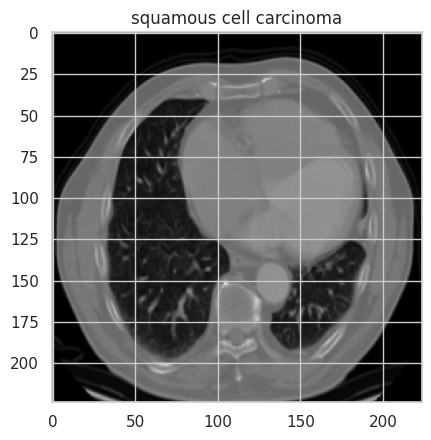

In [ ]:
plt.imshow(images[86])
plt.title(class_names[86])

Text(0.5, 1.0, 'squamous cell carcinoma')

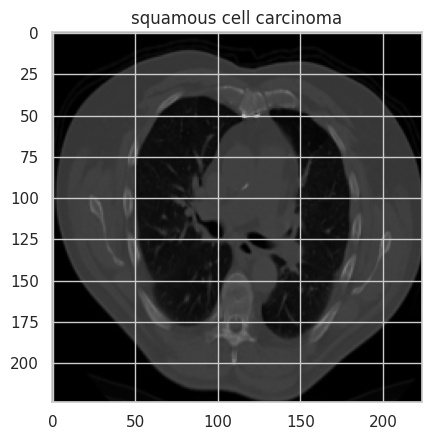

In [ ]:
plt.imshow(images[188])
plt.title(class_names[188])

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(600, 224, 224, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(data['class_label'])

In [ ]:
enc.classes_

array(['adenocarcinoma', 'large cell carcinoma', 'normal',
       'squamous cell carcinoma'], dtype='<U23')

In [ ]:
data['class_label'][:10]

445                     normal
371                     normal
179    squamous cell carcinoma
16                      normal
249       large cell carcinoma
51                      normal
191             adenocarcinoma
298       large cell carcinoma
180             adenocarcinoma
33                      normal
Name: class_label, dtype: object

In [ ]:
y[:10]

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [ ]:
y=np.array(y)
y

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, stratify=y, random_state=43)

In [ ]:
y_train[:5]

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]])

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((480, 224, 224, 3), (480, 4), (120, 224, 224, 3), (120, 4))

In [ ]:
# import the vgg16 model
from keras.applications.vgg16 import VGG16

In [ ]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.trainable=False

In [ ]:
# Set the vgg16 model
model_1=Sequential()
model_1.add(vgg)
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(4, activation='softmax'))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dense (Dense)               (None, 7, 7, 128)         65664     
                                                                 
 dropout (Dropout)           (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 128)               802944    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 5

In [ ]:
#Compile the model
model_1.compile(optimizer = 'rmsprop', loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
History_1 = model_1.fit(x_train, y_train, epochs = 3, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/3
4/4 [==============================] - 376s 99s/step - loss: 22.8249 - accuracy: 0.2958 - val_loss: 3.4242 - val_accuracy: 0.5917
Epoch 2/3
4/4 [==============================] - 379s 99s/step - loss: 2.4806 - accuracy: 0.5833 - val_loss: 0.7023 - val_accuracy: 0.6833
Epoch 3/3
4/4 [==============================] - 385s 102s/step - loss: 0.8374 - accuracy: 0.6833 - val_loss: 0.3787 - val_accuracy: 0.8167


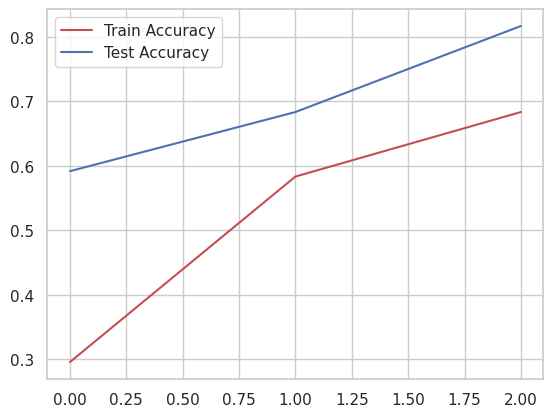

In [ ]:
# plot the accuracy plot
plt.plot(History_1.history['accuracy'], 'r')
plt.plot(History_1.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [ ]:
model_1.save('VGG_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
score_1 = model_1.evaluate(x_test,y_test, verbose=0)
print('Test accuracy:', score_1[1])

Test accuracy: 0.8166666626930237


In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
mob=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
mob.trainable=False

In [ ]:
# Set the Mobilenetv2 model

model_2=Sequential()
model_2.add(mob)
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.2))
model_2.add(Dense(4, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               8028288   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 10286788 (39.24 MB)
Trainable params: 8028804 (30.63 MB)
Non-trainable params: 2257984 (8.61 MB)
_________

In [ ]:
#Compile the model
opt = Adam(lr=0.001)

# optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model_2.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
History_2 = model_2.fit(x_train, y_train, epochs = 15, validation_data = (x_test,y_test),batch_size = 128)

Epoch 1/15
4/4 [==============================] - 34s 8s/step - loss: 26.1169 - accuracy: 0.4208 - val_loss: 8.2216 - val_accuracy: 0.5083
Epoch 2/15
4/4 [==============================] - 29s 8s/step - loss: 6.9090 - accuracy: 0.5146 - val_loss: 3.2191 - val_accuracy: 0.5167
Epoch 3/15
4/4 [==============================] - 29s 8s/step - loss: 2.7293 - accuracy: 0.7042 - val_loss: 1.5406 - val_accuracy: 0.8333
Epoch 4/15
4/4 [==============================] - 30s 8s/step - loss: 1.7335 - accuracy: 0.7833 - val_loss: 0.5822 - val_accuracy: 0.9000
Epoch 5/15
4/4 [==============================] - 33s 9s/step - loss: 0.5577 - accuracy: 0.8646 - val_loss: 0.6654 - val_accuracy: 0.8250
Epoch 6/15
4/4 [==============================] - 29s 7s/step - loss: 0.4396 - accuracy: 0.8625 - val_loss: 0.3285 - val_accuracy: 0.9000
Epoch 7/15
4/4 [==============================] - 30s 7s/step - loss: 0.2745 - accuracy: 0.9062 - val_loss: 0.1622 - val_accuracy: 0.9167
Epoch 8/15
4/4 [=================

In [ ]:
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score_2[1])

Test accuracy: 0.9416666626930237


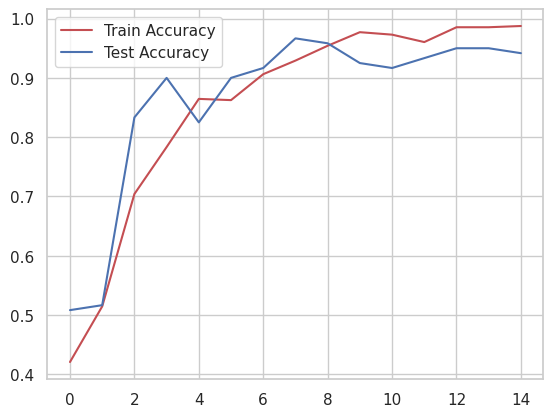

In [ ]:
# plot the accuracy plot
plt.plot(History_2.history['accuracy'], 'r')
plt.plot(History_2.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

In [ ]:
model_2.save('mob_model.h5')